<a href="https://colab.research.google.com/github/ihadzic1/Analysis-of-Nutrition-and-Caloric-Intake-Using-Image-Classification-Models/blob/main/foodanalysisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-datasets
!pip install torch torchvision
!pip install ultralytics opencv-python tensorflow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!pip install torch torchvision
!pip install ultralytics opencv-python tensorflow matplotlib


0: 416x640 2 apples, 1399.1ms
Speed: 5.3ms preprocess, 1399.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


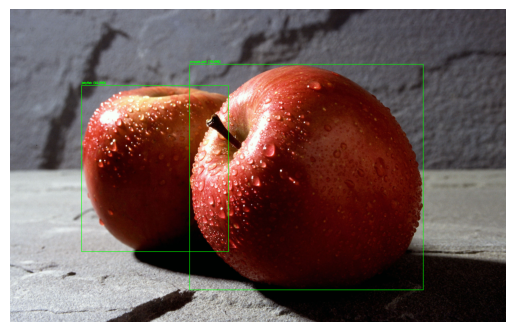

Broj detektovanih objekata: 2


In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Učitaj YOLOv8 model
yolo_model = YOLO("yolov8m.pt")  # "n" je najlakša verzija, možeš koristiti "m" ili "l"

# Učitaj ResNet50 model za klasifikaciju
resnet_model = ResNet50(weights="imagenet")

# Funkcija za detekciju objekata pomoću YOLOv8
def detect_objects(image_path):
    image = cv2.imread(image_path)
    results = yolo_model(image)  # YOLO predikcija

    detections = []
    for r in results:
        for box in r.boxes.data:
            x1, y1, x2, y2, conf, class_id = map(int, box[:6])
            detections.append((x1, y1, x2, y2, conf, class_id))

    return image, detections

# Funkcija za klasifikaciju hrane pomoću ResNet-a
def classify_food(image_crop):
    image_crop = cv2.resize(image_crop, (224, 224))
    image_crop = np.expand_dims(image_crop, axis=0)
    image_crop = preprocess_input(image_crop)

    predictions = resnet_model.predict(image_crop)
    label = decode_predictions(predictions, top=1)[0][0][1]
    confidence = decode_predictions(predictions, top=1)[0][0][2] * 100  # Postotak

    return label, confidence

# Detekcija i klasifikacija
image_path = "/content/drive/MyDrive/Fuji_apple.jpg"
image, detections = detect_objects(image_path)

# Kreiraj kopiju slike za prikaz
output_image = image.copy()

for (x1, y1, x2, y2, conf, class_id) in detections:
    # Isijeci objekat iz slike
    object_crop = image[y1:y2, x1:x2]

    # Klasificiraj objekat pomoću ResNet-a
    label, confidence = classify_food(object_crop)

    # Prikaži rezultate
    cv2.rectangle(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(output_image, f"{label} ({confidence:.2f}%)", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Prikaz slike
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print(f"Broj detektovanih objekata: {len(detections)}")


In [ ]:
labels = info.features['label'].names
print("Labele u datasetu:", labels)


Labele u datasetu: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'm